In [13]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from torch import nn
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import load_config
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [15]:
config_folder = "config/"
config = load_config(config_folder)

training metric file outputs\re\BioBERT_fc2020-11-25 23_01_58_468659_train_metrics_.pkl
[[0, 795.2006728649139, 0.030303030303030304], [1, 781.8519937992096, 0.020202020202020204], [2, 791.9081404209137, 0.050505050505050504], [3, 736.380672454834, 0.06060606060606061], [4, 735.3668797016144, 0.1111111111111111], [5, 727.2399151325226, 0.1414141414141414], [6, 689.2043881416321, 0.09090909090909091], [7, 668.5256366729736, 0.24242424242424243], [8, 607.2350424528122, 0.24242424242424243], [9, 639.9737530946732, 0.2828282828282828]]

 
 



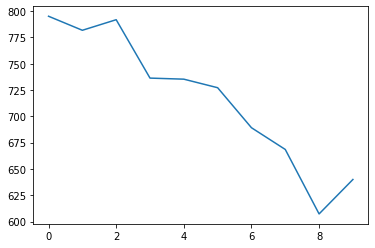

In [28]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
for metrics_file in list_train_metrics:
    print('training metric file', metrics_file)
    with open(metrics_file,"rb") as f:
        train_metric = pickle.load(f)
        print(train_metric)

    print("\n \n \n")


plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])


In [7]:
pd.set_option('display.max_colwidth', 120)
columns = ['file_namae', 'f1-score']
test_results= pd.DataFrame(f1_score_list, columns = columns)
test_results

,file_namae,f1-score
0,outputs\re\BioBERT_fc2020-11-25 01_06_44_926278.bin,0.966591
1,outputs\re\BioBERT_fc2020-11-25 04_15_53_420251.bin,0.967590
2,outputs\re\test_evaluated\BERT_Sequence2020-11-16 22_21_41_536138.bin,0.961873
3,outputs\re\test_evaluated\BERT_Sequence2020-11-20 04_03_11_148846.bin,0.962464
4,outputs\re\test_evaluated\BERT_Sequence2020-11-20 12_33_00_408665.bin,0.962988
5,outputs\re\test_evaluated\BioBERT_5epochs.bin,0.965785
6,outputs\re\test_evaluated\BioBERT_5epochs_256seq.bin,0.966362
7,outputs\re\test_evaluated\BioBERT_fc2020-11-16 00_40_57_659995.bin,0.950330
8,outputs\re\test_evaluated\BioBERT_fc2020-11-16 03_37_07_579463.bin,0.966757
9,outputs\re\test_evaluated\BioBERT_fc2020-11-16 16_17_55_396529.bin,0.967060


In [ ]:
# print ("F1 Score summary \n")  
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# plt.box(on=None)
# plt.figure(figsize=(14,6))
# the_table = plt.table(cellText=f1_score_list,
#                       colLabels=['file name', 'F1-score'],
#                       loc='center')
# the_table.auto_set_font_size(False)
# the_table.set_fontsize(10)